In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Icarus

import statistics
import astropy.units as u
import healpy as hp
import pyshtools as psh
import hipercam as hcam
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Eclipse.py: The Eclipse module needs updating as it is not compatible with Python 3.x.
Eclipse.py: weave cannot be imported from scipy nor on its own.
Eclipse.py: The Shapely package cannot be imported. This module can but no eclipse optimization can be used.


# we're working with z band here not i band

In [2]:
hlog = hcam.hlog.Hlog.rascii('/home/sorcha/Data/2010_05_06_2/run014b.log')

In [3]:
## hlog.tseries?

In [4]:
## Declaring Constants, values taken from Archibald et al: A Radio Pulsar / X-ray Binary Link

To = 54801.97065348 ## ephemeral time / time if ascending node / reference time

P = 0.1980962019 ##* 24 * 60 * 60  ## orbital period

In [5]:
# def median(a, b, c, d):
    
#     intake = [a, b, c, d]
#     print(intake)
    
#     order = np.sort(intake)
    
#     med = statistics.median(order)
    
#     print(med)
    
#     return med

# ## Test Code
# a = 17
# b = 15
# c = 2
# d = 90

# median(a,b,c,d)

Signature: hlog.tseries(cnam, apnam, name='counts', ecol=True)
Docstring:
Returns with a Tseries corresponding to CCD cnam and
aperture apnam. By default it accesses the 'counts',
but 'x', 'y', 'fwhm', 'beta', 'sky' and 'cmax' are alternative
choices. Looks at the column names in a HiPERCAM log.
Can also access items not specific to apertures.

Arguments:

   cnam : str
      CCD label. 'str' will be used to make a string of non-string
      entries.

   apnam : str
      Aperture label. Set = 'None' if the item of interest is not
      specific to apertures, e.g. 'mfwhm'.

   name : str
      Item to return. e.g. 'counts', 'x', 'fwhm', 'mfwhm'. If apnam is
      not None, then f"{name}_{apnam}" will be used as the column name,
      else f"{name}"

   ecol : bool
      If True, an attempt will be made to read errors from a
      column called f"{name}e_{apnam}" or f"{name}e" will be
      made. If ecol is False or the error columns don't exist,
      the errors are set = 0.
File:      /home/mark/Software/astropython/lib/python3.8/site-packages/hipercam/hlog.py
Type:      method


Stars:
- 1: PSR J1023 + 0038, our target star
- 2: UCAC4 454 - 048421, our reference star
- 3: 2MASS J10233846 + 0036244
- 4: 2MASS J10235051 + 0038163
- 5: UNKNOWN
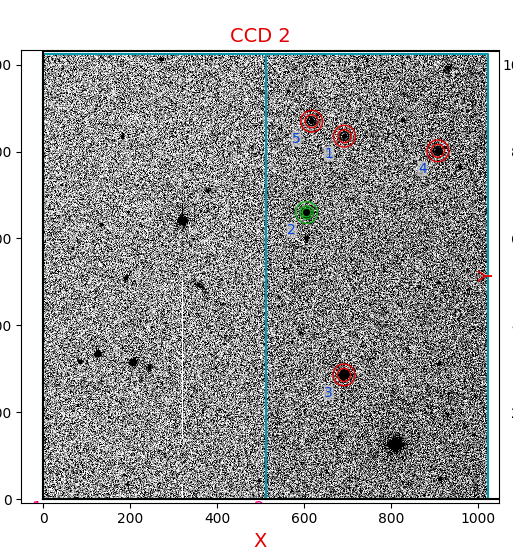


In [6]:
## The Magnitudes of the 4 comparison stars in each band are given below:

## 2: UCAC4 454-048421
u2 = 16.66
g2 = 15.55
i2 = 14.872
z2 = 14.656

## 3: 2MASS J10233846 + 0036244
u3 = 17.149
g3 = 15.549
i3 = 14.723
z3 = 14.351

## 4: 2MASS J10235051 + 0038163
u4 = 22.423
g4 = 20.027
i4 = 17.477
z4 = 16.81

## 5: UNKNOWN
u5 = 20.849
g5 = 18.341
i5 = 16.786
z5 = 16.554

In [7]:
targ1 = hlog.tseries('1','1') # target
comp1 = hlog.tseries('1','2') # comparison
ratio1 = targ1 / comp1 # ratio of target to comparison

#ratio1.mplot(plt, color = '#800020')
#plt.show()

/tmp/ipykernel_1751203/1746126506.py:32: RuntimeWarning: invalid value encountered in log10
  zmaga = z2- 2.5*np.log10(T1a[2]) # z-magnitudes from star 2


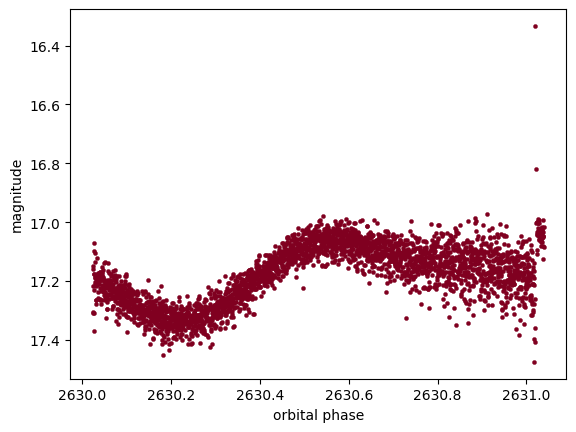

In [8]:
## average i-band magnitude for PSR J1023 

targ1 = hlog.tseries('1','1') # target

comp1a = hlog.tseries('1','2') # comparison star 2
comp1b = hlog.tseries('1','3') # comparison star 3
comp1c = hlog.tseries('1','4') # comparison star 4
comp1d = hlog.tseries('1','5') # comparison star 5

ratio1a = targ1 / comp1a # ratio of target to comparison 2
ratio1b = targ1 / comp1b # ratio of target to comparison 3
ratio1c = targ1 / comp1c # ratio of target to comparison 4
ratio1d = targ1 / comp1d # ratio of target to comparison 5


## I need to extract the data from the Tseries

T1a = ratio1a.get_data(None, False) # extracted data for star 2
T1b = ratio1b.get_data(None, False) # extracted data for star 3
T1c = ratio1c.get_data(None, False) # extracted data for star 4
T1d = ratio1d.get_data(None, False) # extracted data for star 5

## Declaring and initialising arrays:

zmaga = [] # for star 2
zmagb = [] # for star 3
zmagc = [] # for star 4
zmagd = [] # for star 5

# Calculating the magnitudes:

zmaga = z2- 2.5*np.log10(T1a[2]) # z-magnitudes from star 2
zmagb = z3- 2.5*np.log10(T1b[2]) # z-magnitudes from star 3
zmagc = z4- 2.5*np.log10(T1c[2]) # z-magnitudes from star 4
zmagd = z5- 2.5*np.log10(T1d[2]) # z-magnitudes from star 5

## Calculating the average magnitude and storing it in an array

zmag = []

zmag = (zmaga + zmagb + zmagc + zmagd)/4

## Plotting the results:

##plt.plot((T1a[0]-To)/P, imag, 'r+')

plt.scatter((T1a[0]-To)/P, zmag, marker = '.', color = '#800020', linewidths = 0.25)
plt.xlabel('orbital phase')
plt.ylabel('magnitude')

ax = plt.gca()
ax.invert_yaxis()

Phase = []
Phase = (T1a[0]-To)/P

In [9]:
## average z-band error in the magnitude for PSR J1023 


## Declaring and initialising arrays:

zmaga_err = [] # for star 2
zmagb_err = [] # for star 3
zmagc_err = [] # for star 4
zmagd_err = [] # for star 5

# Calculating the magnitudes:

zmaga_err = T1a[3] # z-magnitudes from star 2
zmagb_err = T1b[3] # z-magnitudes from star 3
zmagc_err = T1c[3] # z-magnitudes from star 4
zmagd_err = T1d[3] # z-magnitudes from star 5


## Calculating the average magnitude and storing it in an array

zmag_err = []

zmag_err = (zmaga_err + zmagb_err + zmagc_err + zmagd_err)/4

## Plotting the results:

##plt.plot((T1a[0]-To)/P, imag_err, 'r+')


In [10]:
targ2 = hlog.tseries('2','1')
comp2 = hlog.tseries('2','5')
ratio2 = targ2 / comp2
##ratio2.mplot(plt, 'g')
##plt.show()

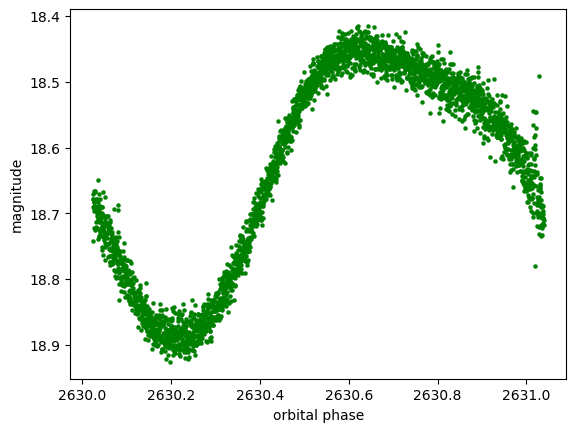

In [11]:
## average g-band magnitude for PSR J1023 

targ2 = hlog.tseries('2','1') # target

comp2a = hlog.tseries('2','2') # comparison star 2
comp2b = hlog.tseries('2','3') # comparison star 3
comp2c = hlog.tseries('2','4') # comparison star 4
comp2d = hlog.tseries('2','5') # comparison star 5

ratio2a = targ2 / comp2a # ratio of target to comparison 2
ratio2b = targ2 / comp2b # ratio of target to comparison 3
ratio2c = targ2 / comp2c # ratio of target to comparison 4
ratio2d = targ2 / comp2d # ratio of target to comparison 5


## I need to extract the data from the Tseries

T2a = ratio2a.get_data(None, False) # extracted data for star 2
T2b = ratio2b.get_data(None, False) # extracted data for star 3
T2c = ratio2c.get_data(None, False) # extracted data for star 4
T2d = ratio2d.get_data(None, False) # extracted data for star 5

## Declaring and initialising arrays:

gmaga = [] # for star 2
gmagb = [] # for star 3
gmagc = [] # for star 4
gmagd = [] # for star 5

# Calculating the magnitudes:

gmaga = g2- 2.5*np.log10(T2a[2]) # i-magnitudes from star 2
gmagb = g3- 2.5*np.log10(T2b[2]) # i-magnitudes from star 3
gmagc = g4- 2.5*np.log10(T2c[2]) # i-magnitudes from star 4
gmagd = g5- 2.5*np.log10(T2d[2]) # i-magnitudes from star 5

## Calculating the average magnitude and storing it in an array

gmag = []

gmag = (gmaga + gmagb + gmagc + gmagd)/4

## Printing the results:

plt.scatter((T2a[0]-To)/P, gmag, marker = '.', color = 'g', linewidths = 0.2)
plt.xlabel('orbital phase')
plt.ylabel('magnitude')

ax = plt.gca()
ax.invert_yaxis()


In [12]:
## average g-band error in the magnitude for PSR J1023 

## Declaring and initialising arrays:

gmaga_err = [] # for star 2
gmagb_err = [] # for star 3
gmagc_err = [] # for star 4
gmagd_err = [] # for star 5

# Calculating the magnitudes:

gmaga_err = (T2a[3]) # g-magnitudes from star 2
gmagb_err = (T2b[3]) # g-magnitudes from star 3
gmagc_err = (T2c[3]) # g-magnitudes from star 4
gmagd_err = (T2d[3]) # g-magnitudes from star 5

## Calculating the average magnitude and storing it in an array

gmag_err = []

gmag_err = (gmaga_err + gmagb_err + gmagc_err + gmagd_err)/4

## Plotting the results:

##plt.plot((T2a[0]-To)/P, gmag_err, 'g+')

In [13]:
targ3 = hlog.tseries('3','1')
comp3 = hlog.tseries('3','2')
ratio3 = targ3 / comp3
##ratio3.mplot(plt, 'b')
##plt.show()

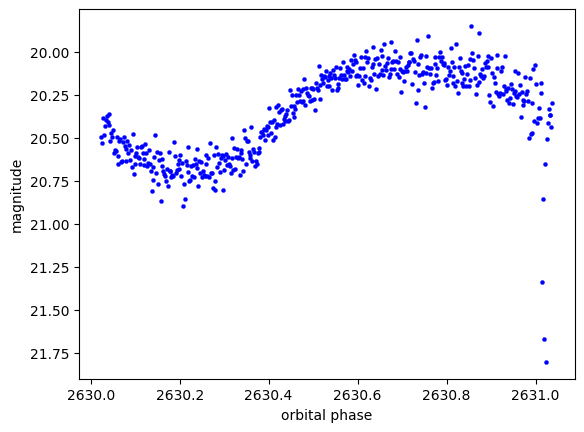

In [14]:
## average u-band magnitude for PSR J1023 

targ3 = hlog.tseries('3','1') # target

comp3a = hlog.tseries('3','2') # comparison star 2
comp3b = hlog.tseries('3','3') # comparison star 3
comp3c = hlog.tseries('3','4') # comparison star 4
comp3d = hlog.tseries('3','5') # comparison star 5

ratio3a = targ3 / comp3a # ratio of target to comparison 2
ratio3b = targ3 / comp3b # ratio of target to comparison 3
ratio3c = targ3 / comp3c # ratio of target to comparison 4
ratio3d = targ3 / comp3d # ratio of target to comparison 5


## I need to extract the data from the Tseries

T3a = ratio3a.get_data(None, False) # extracted data for star 2
T3b = ratio3b.get_data(None, False) # extracted data for star 3
T3c = ratio3c.get_data(None, False) # extracted data for star 4
T3d = ratio3d.get_data(None, False) # extracted data for star 5

## Declaring and initialising arrays:

umaga = [] # for star 2
umagb = [] # for star 3
umagc = [] # for star 4
umagd = [] # for star 5

# Calculating the magnitudes:

umaga = u2- 2.5*np.log10(T3a[2]) # i-magnitudes from star 2
umagb = u3- 2.5*np.log10(T3b[2]) # i-magnitudes from star 3
umagc = u4- 2.5*np.log10(T3c[2]) # i-magnitudes from star 4
umagd = u5- 2.5*np.log10(T3d[2]) # i-magnitudes from star 5

## Calculating the average magnitude and storing it in an array

umag = []

umag = (umaga + umagb + umagc + umagd)/4

## Printing the results:

plt.scatter((T3a[0]-To)/P, umag, marker = '.', color = 'b', linewidths = 0.2)
plt.xlabel('orbital phase')
plt.ylabel('magnitude')

ax = plt.gca()
ax.invert_yaxis()


In [15]:
## average u-band error in the magnitude for PSR J1023 


## Declaring and initialising arrays:

umaga_err = [] # for star 2
umagb_err = [] # for star 3
umagc_err = [] # for star 4
umagd_err = [] # for star 5

# Calculating the magnitudes:

umaga_err = (T3a[3]) # u-magnitudes from star 2
umagb_err = (T3b[3]) # u-magnitudes from star 3
umagc_err = (T3c[3]) # u-magnitudes from star 4
umagd_err = (T3d[3]) # u-magnitudes from star 5

## Calculating the average magnitude and storing it in an array

umag_err = []

umag_err = (umaga_err + umagb_err + umagc_err + umagd_err)/4

## Plotting the results:

##plt.plot((T3a[0]-To)/P, umag_err, 'b+')

In [16]:
# fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[12,4])

# ax[0].scatter((T1a[0]-To)/P, imag, label="i-band", zorder=1, marker='*', color = 'r', linewidths=1)
# ax[0].scatter((T2a[0]-To)/P, gmag, label="g-band", zorder=1, marker='*', color = 'g', linewidths=1)
# ax[0].scatter((T3a[0]-To)/P, umag, label="u-band", zorder=1, marker='*', color = 'b', linewidths=1)
# ax[0].legend()
# ax[0].set_xlabel("Orbital Phase")
# ax[0].set_ylabel("Magnitude")

# ax[1].scatter((T1a[0]-To)/P, imag, label="i-band", zorder=1, marker='.', color = 'r', linewidths=1)
# ax[1].scatter((T2a[0]-To)/P, gmag, label="g-band", zorder=1, marker='.', color = 'g', linewidths=1)
# ax[1].scatter((T3a[0]-To)/P, umag, label="u-band", zorder=1, marker='.', color = 'b', linewidths=1)
# ax[1].legend()
# ax[1].legend()
# ax[1].set_xlabel("Orbital Phase")
# ax[1].set_ylabel("Magnitude")
# ax[1].invert_yaxis()

# plt.show()

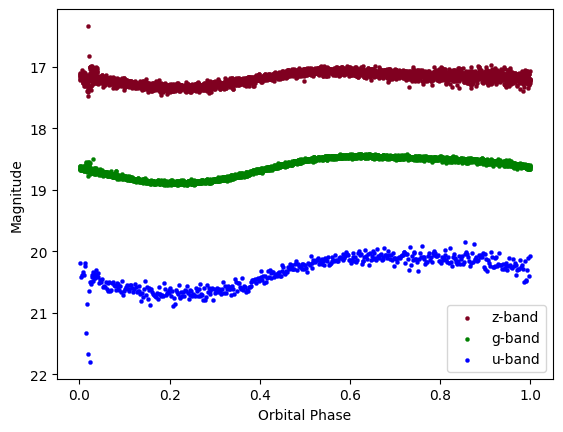

In [17]:
orb_phasez = []
orb_phasez = ((T1a[0]-To)/P)%1

orb_phaseg = []
orb_phaseg = ((T2a[0]-To)/P)%1

orb_phaseu = []
orb_phaseu = ((T3a[0]-To)/P)%1


plt.scatter(orb_phasez, zmag, label='z-band', marker = '.', color = '#800020', linewidths = 0.2)
plt.scatter(orb_phaseg, gmag, label='g-band', marker = '.', color = 'g', linewidths = 0.2)
plt.scatter(orb_phaseu, umag, label='u-band', marker = '.', color = 'b', linewidths = 0.2)

plt.legend()

plt.xlabel('Orbital Phase')
plt.ylabel('Magnitude')


ax = plt.gca()
ax.invert_yaxis()

## would like also to plot the error bars if at all possible

In [18]:
Terr = ratio1a.get_data(None, False)
print(Terr[0],Terr[1], Terr[2], Terr[3])

[55322.96831732 55322.96839134 55322.96845799 ... 55323.16935573
 55323.16942238 55323.16948904] [7.12837720e-05 6.63765216e-05 6.63765216e-05 ... 6.63765161e-05
 6.63765216e-05 6.63765216e-05] [0.06865197 0.07862043 0.078564   ... 0.07642755 0.08190224 0.07696124] [0.00900978 0.00619752 0.00643288 ... 0.00204744 0.0022012  0.00214676]


In [19]:
## Mags to Flux

z_flux = 10**(-(zmag + 48.6)/2.5)

print(z_flux)

g_flux = 10**(-(gmag + 48.6)/2.5)
u_flux = 10**(-(umag + 48.6)/2.5)

[4.3418068e-27 5.0131799e-27 4.9698187e-27 ... 5.3349099e-27 5.6710821e-27
 5.3221791e-27]


In [20]:
## Flux Errors

z_flux_err = z_flux * zmag_err
g_flux_err = g_flux * gmag_err
u_flux_err = u_flux * umag_err



### And now we start writing to text files!  I'm not sure what we need in these files though.

I think its phase, magnitude, mag error but there's also a 4th column...

In [21]:
open("z_flux.txt", "w")
open("g_flux_night3.txt", "w")
open("u_flux_night3.txt", "w")

hlog.write("testing.txt")
hlog.write("testing.txt")
np.savetxt("z_flux.txt",np.c_[T1a[0], orb_phasez, z_flux, z_flux_err])
np.savetxt("g_flux_night3.txt",np.c_[T2a[0], orb_phaseg, g_flux, g_flux_err])
np.savetxt("u_flux_night3.txt",np.c_[T3a[0], orb_phaseu, u_flux, u_flux_err])